# Unveiling the Force – A Star Wars Fan Survey Analysis

## Table of Contents

- [1. Introducing and Exploring the Data](#1.-Introducing-and-Exploring-the-Data)
- [2. Cleaning and Mapping Yes/No Columns](#2.-Cleaning-and-Mapping-Yes/No-Columns)
- [3. Cleaning and Mapping Checkbox Columns](#3.-Cleaning-and-Mapping-Checkbox-Columns)
- [4. Cleaning the Ranking Columns](#4.-Cleaning-the-Ranking-Columns)
- [5. Finding the Highest-Ranked Movie](#5.-Finding-the-Highest-Ranked-Movie)
- [6. Finding the Most Viewed Movie](#6.-Finding-the-Most-Viewed-Movie)
- [7. Exploring the Data by Binary Segments](#7.-Exploring-the-Data-by-Binary-Segments)
    - [7.1. Calculating and Visualizing the Mean Rankings for Each Gender](#7.1.-Calculating-and-Visualizing-the-Mean-Rankings-for-Each-Gender)
    - [7.2. Calculating and Visualizing the Total Views for Each Gender](#7.2.-Calculating-and-Visualizing-the-Total-Views-for-Each-Gender)
- [8. Exploring the Data by Non-binary Segments](#8.-Exploring-the-Data-by-Non-binary-Segments)
    - [8.1. Calculating the Mean Rankings for Each Education Level](#8.1.-Calculating-the-Mean-Rankings-for-Each-Education-Level)
    - [8.2. Visualizing the Mean Rankings for Each Education Level](#8.2.-Visualizing-the-Mean-Rankings-for-Each-Education-Level)
- [9. Exploring Sentiments toward Star Wars Characters](#9.-Exploring-Sentiments-toward-Star-Wars-Characters)
    - [9.1. Renaming Columns and Categorizing Respondents' Sentiments](#9.1.-Renaming-Columns-and-Categorizing-Respondents'-Sentiments)
    - [9.2. Calculating the Percentages of Sentiment Categories for Each Character](#9.2.-Calculating-the-Percentages-of-Sentiment-Categories-for-Each-Character)
    - [9.3. Revealing the Most Liked, Disliked, and Controversial Characters](#9.3.-Revealing-the-Most-Liked,-Disliked,-and-Controversial-Characters)
- [10. Conclusion](#10.-Conclusion)

## 1. Introducing and Exploring the Data

While awaiting the release of [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens), the team at [FiveThirtyEight](https://abcnews.go.com/538) became intrigued by some questions regarding Star Wars fans. Specifically, they pondered: **Does the rest of America acknowledge that “The Empire Strikes Back” is undeniably the best of the series?**

<div>
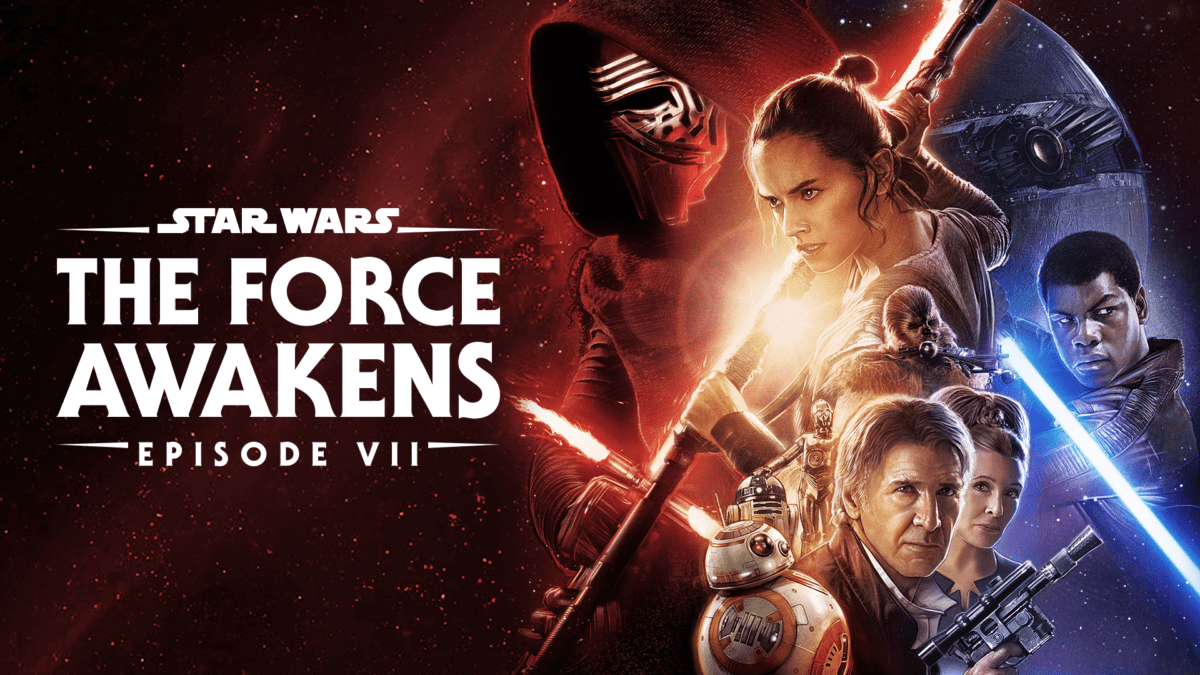
</div>

The team needed to gather data to address this question. Consequently, they surveyed Star Wars fans using the online tool [SurveyMonkey](https://www.surveymonkey.com/) and obtained a total of `835` responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). Next, we have to specify an encoding because the dataset contains some characters that are not in Python's default `UTF-8`. Moreover, the data comprises several columns, including the following:

- `RespondentID` – anonymized ID for the survey respondent.
- `Gender` – the respondent's gender.
- `Age` – the respondent's age.
- `Household Income` – the respondent's income.
- `Education` – the respondent's education level.
- `Location (Census Region)` – the respondent's location.
- `Have you seen any of the 6 films in the Star Wars franchise?` – a **Yes** or **No** response.
- `Do you consider yourself to be a fan of the Star Wars film franchise?` – a **Yes** or **No** response.

Now, let's explore the Star Wars dataset by displaying the first few rows and observing the column names.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# Read the Star Wars dataset from the specified CSV file, using ISO-8859-1 encoding
star_wars = pd.read_csv("Datasets/star_wars.csv", encoding="ISO-8859-1")

# Display the first few rows
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.00,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.00,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.00,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.00,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
# Display the column names of the Star Wars dataset
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

There are several columns containing responses to questions about the Star Wars movies. For certain questions, respondents had to select one or more options by checking boxes. Since representing this type of data in a single column can be challenging, this dataset requires extensive cleaning.

## 2. Cleaning and Mapping Yes/No Columns

The next two columns both represent `Yes/No` questions and may also contain `NaN` values if a respondent chooses not to answer:

1. **Have you seen any of the 6 films in the Star Wars franchise?**
2. **Do you consider yourself to be a fan of the Star Wars film franchise?**

In [3]:
# Display the count of each unique response in both columns, including missing values
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
print()
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


Both columns are currently of string type, primarily containing `Yes` and `No` values. To simplify the data for analysis, we'll convert these values to boolean type, using `True` for `Yes` and `False` for `No`. This will allow easier row selection without requiring string comparisons.

Respondents who skipped the question **"Do you consider yourself to be a fan of the Star Wars film franchise?"** may not have a clear stance on whether they consider themselves fans. Therefore, we will replace null values with the string `Undecided`.

In [4]:
# Define a mapping to convert string values to boolean and handling missing values
mapping = {"Yes": True, "No": False, np.nan: "Undecided"}

# Iterate through both columns and map their values using the `mapping` dictionary
for col in ["Have you seen any of the 6 films in the Star Wars franchise?",
            "Do you consider yourself to be a fan of the Star Wars film franchise?"]:
    star_wars[col] = star_wars[col].map(mapping)

# Display the count of each unique value in both columns after mapping
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))
print()
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True         552
Undecided    350
False        284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


As we can see, both columns only contain the values `True`, `False`, or `Undecided`.

## 3. Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. Respondents checked off a series of boxes in response to the question: **Which of the following Star Wars films have you seen? Please select all that apply**.

- `Which of the following Star Wars films have you seen? Please select all that apply.` – indicates whether the respondent saw the `1st` episode of Star Wars.
- `Unnamed: 4` – indicates whether the respondent saw the `2st` episode of Star Wars.
- `Unnamed: 5` – indicates whether the respondent saw the `3st` episode of Star Wars.
- `Unnamed: 6` – indicates whether the respondent saw the `4st` episode of Star Wars.
- `Unnamed: 7` – indicates whether the respondent saw the `5st` episode of Star Wars.
- `Unnamed: 8` – indicates whether the respondent saw the `6st` episode of Star Wars.

For each of these columns, if a cell contains the title of a movie, it indicates that the respondent saw the movie. If the value is `NaN`, it suggests that the respondent either didn't answer or didn't see the film. In our analysis, we'll assume that `NaN` values imply the respondent didn't see the movie.

In [5]:
# Define a mapping to convert movie titles to boolean values
mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

# Iterate over each column containing movie titles, and map them to boolean values
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(mapping)

Next, let's rename the columns indicating which episodes the respondents have seen to have more intuitive names.

In [6]:
# Rename the columns for better clarity
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

# Display the first few rows of the columns
star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


The columns now have intuitive names, and contain only `True` and `False` values to indicate whether a respondent saw each of the six Star Wars episodes.

## 4. Cleaning the Ranking Columns

The subsequent six columns prompt respondents to rank the Star Wars movies from least to most favorite, with `1` indicating the most favorite and `6` indicating the least. Each column may contain values `1` through `6` or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` – indicates how much the respondent liked the `1st` episode of Star Wars.
- `Unnamed: 10` – indicates how much the respondent liked the `2st` episode of Star Wars.
- `Unnamed: 11` – indicates how much the respondent liked the `3st` episode of Star Wars.
- `Unnamed: 12` – indicates how much the respondent liked the `4st` episode of Star Wars.
- `Unnamed: 13` – indicates how much the respondent liked the `5st` episode of Star Wars.
- `Unnamed: 14` – indicates how much the respondent liked the `6st` episode of Star Wars.

First, we'll need to convert each column to a numeric type, then rename the columns so that we can easily discern their representation.

In [7]:
# Convert the columns containing rankings to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the columns for better clarity
star_wars = star_wars.rename({
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        }, axis=1)

# Display the first few rows of the cleaned and renamed ranking columns
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,3.00,2.00,1.00,4.00,5.00,6.00
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.00,2.00,3.00,4.00,5.00,6.00
3,5.00,6.00,1.00,2.00,4.00,3.00
4,5.00,4.00,6.00,2.00,1.00,3.00


Each ranking column now has the `float` data type, which better represents the rankings of the Star Wars movies. Also, each column has been intuitively renamed. Next, let's analyze the missing values in these columns.

In [8]:
# Select the ranking columns, and check for missing values in each one
ranking_columns = star_wars[star_wars.columns[9:15]]
ranking_columns.isnull().sum()

ranking_1    351
ranking_2    350
ranking_3    351
ranking_4    350
ranking_5    350
ranking_6    350
dtype: int64

We notice there is almost the same number of missing values across the ranking columns, with only `ranking_1` and `ranking_3` having an additional missing value compared to the others. Now, let's plot a heatmap of null values for these columns.

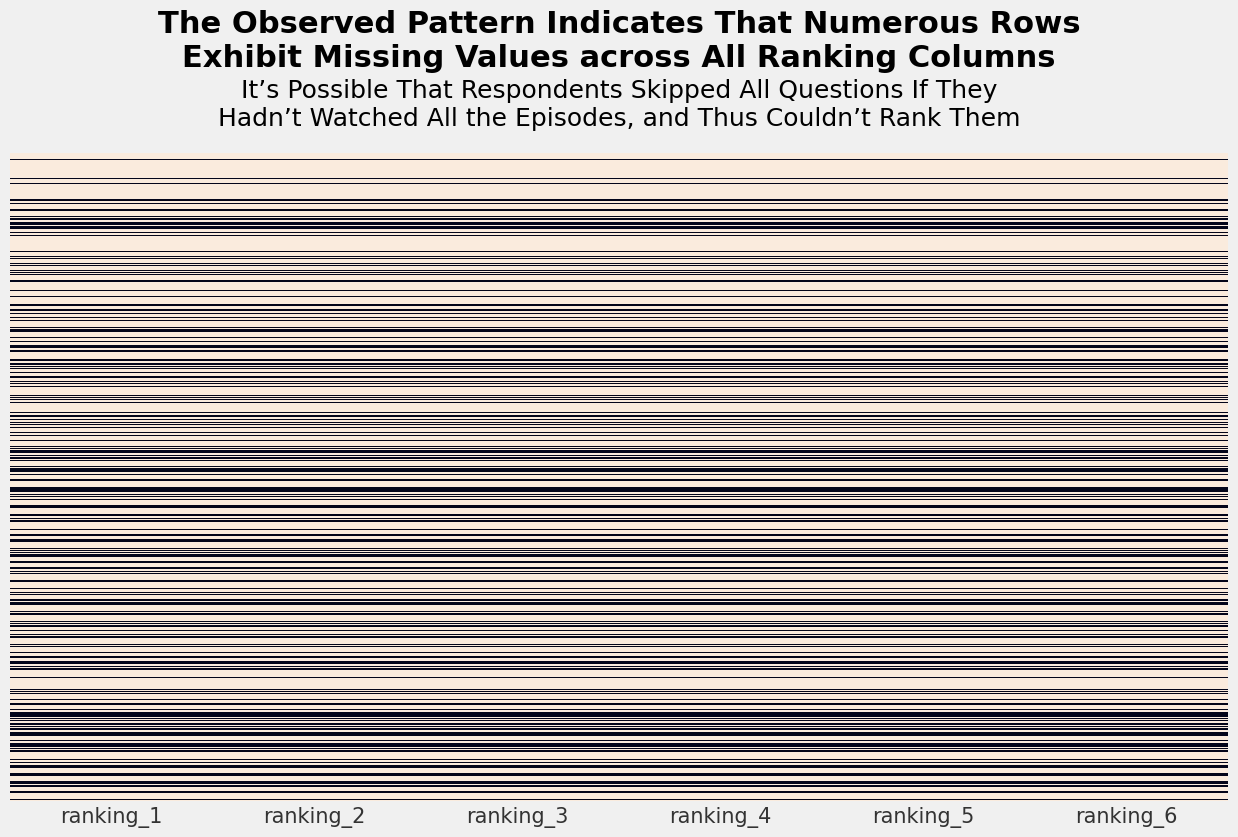

In [9]:
# Set the plot style to 'fivethirtyeight',
# and create a heatmap to visualize the missing values in ranking columns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 8))
sns.heatmap(ranking_columns.notnull(), cbar=False, yticklabels=False)
plt.xticks(size=15, c='#333333')

# Add a main title and a subtitle
plt.suptitle("The Observed Pattern Indicates That Numerous Rows\n\
Exhibit Missing Values across All Ranking Columns",
             x=0.515, y=1.06, size=22, ha='center', weight='bold')
plt.figtext(s="It’s Possible That Respondents Skipped All Questions If They\n\
Hadn’t Watched All the Episodes, and Thus Couldn’t Rank Them",
            ha="center", x=0.515, y=0.915, size=18)

# Display the plot
plt.show()

Based on the pattern observed in the null matrix, we notice that many rows have missing values across all ranking columns. This repetitive pattern suggests there may be a systematic reason why these particular respondents did not provide rankings for any of the Star Wars films. It's possible that respondents skipped all questions if they hadn't watched all the episodes, and thus couldn't rank them. 

Next, we're going to calculate the correlation between null values in the ranking columns and plot a null correlation heatmap.

In [10]:
# Calculate the correlation between null values in the ranking columns
missing_corr = ranking_columns.isnull().corr().iloc[1:, :-1]
missing_corr

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5
ranking_2,1.00,1.00,1.00,1.00,1.00
ranking_3,1.00,1.00,1.00,1.00,1.00
ranking_4,1.00,1.00,1.00,1.00,1.00
ranking_5,1.00,1.00,1.00,1.00,1.00
ranking_6,1.00,1.00,1.00,1.00,1.00


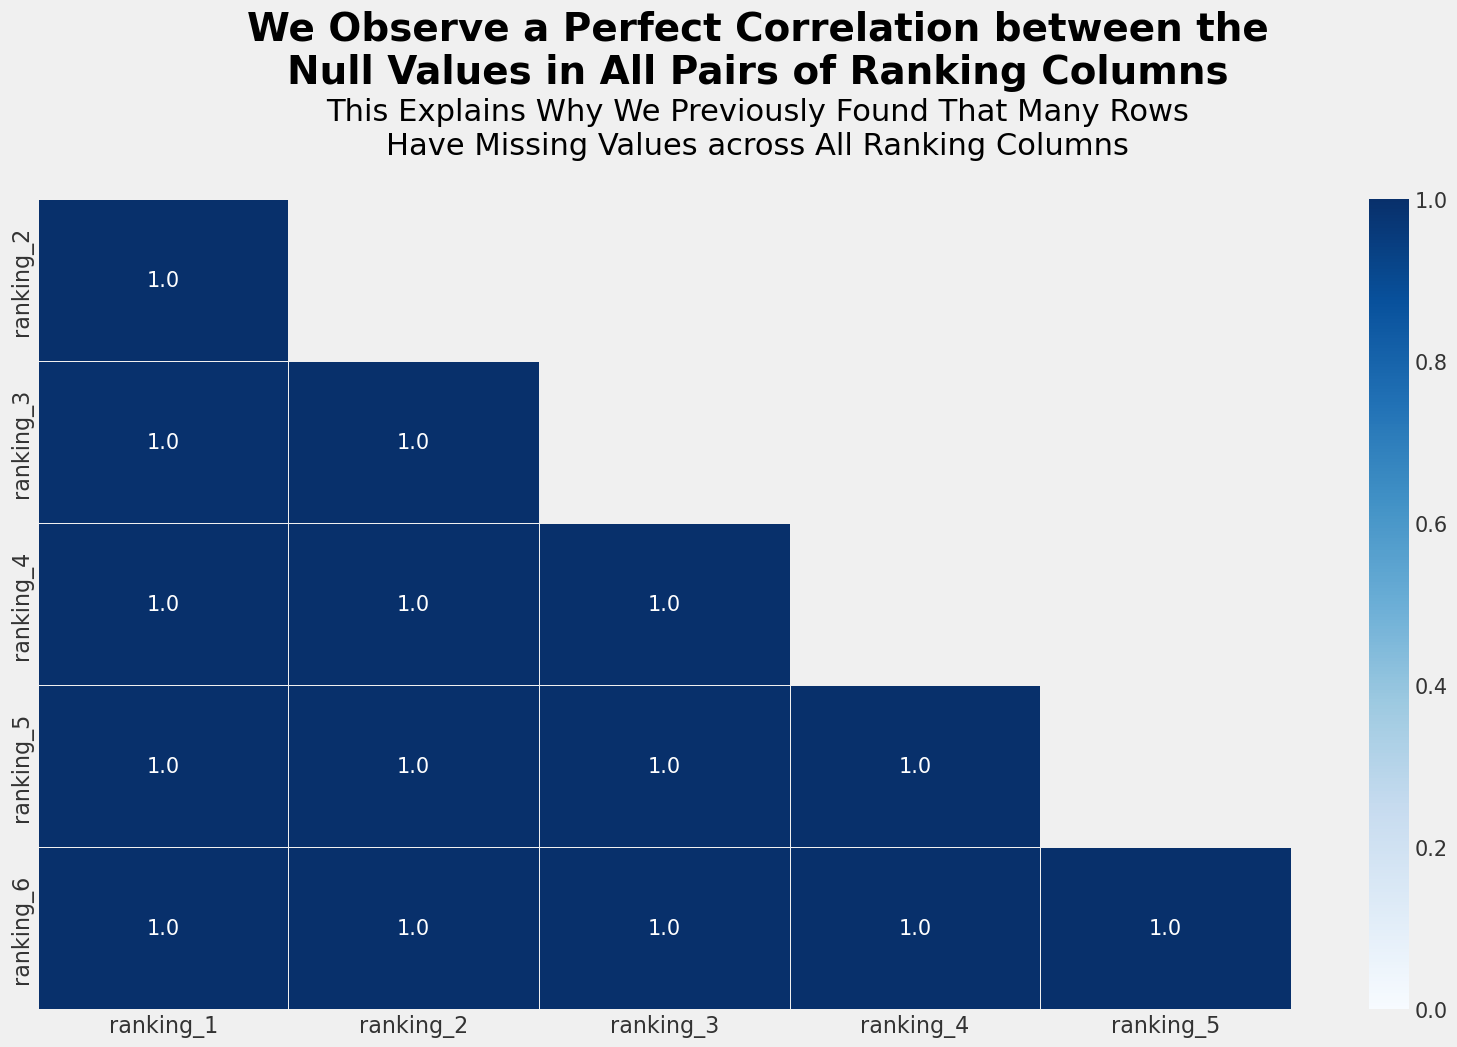

In [11]:
# Plot a heatmap with masked upper triangle to visualize null correlations
plt.figure(figsize=(18, 10))
mask = np.triu(np.ones_like(missing_corr), k=1)
ax = sns.heatmap(missing_corr, mask=mask, vmin=0, vmax=1, annot=True, annot_kws={"size": 15},
                 linewidths=0.6, linecolor='#f0f0f0', cmap='Blues')
ax.tick_params(labelcolor='#333333', labelsize=16, length=0)
ax.grid(visible=False)

# Add a main title and a subtitle
plt.suptitle("We Observe a Perfect Correlation between the\n\
Null Values in All Pairs of Ranking Columns",
             x=0.48, y=1.07, size=28, ha='center', weight='bold')
plt.figtext(s="This Explains Why We Previously Found That Many Rows\n\
Have Missing Values across All Ranking Columns",
            ha="center", x=0.48, y=0.925, size=22)

# Adjust annotations and hide near-zero values
for text in ax.texts:
    t = float(text.get_text())
    if -0.05 < t < 0.01:
        text.set_text('')
    else:
        text.set_text(round(t, 2))
        
# Adjust the size of the colorbar values
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15, labelcolor='#333333')

# Display the plot
plt.show()

The plot indicates a perfect correlation of `1` between the null values in all pairs of ranking columns. This implies that if one column has a missing value, the corresponding column also has a missing value, and vice versa, across all pairs of columns. This also explains why we previously found that many rows have missing values across all ranking columns.

Since the ranking columns represent numerical values, we'll keep the missing values intact to ensure we can apply functions which will perform calculations on each column.

## 5. Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can quickly determine the highest-ranked Star Wars movie. We'll achieve this by calculating the mean of each ranking column and then visualizing the mean rankings for each movie.

In [12]:
# Calculate the mean of each ranking column
mean_rankings = star_wars[star_wars.columns[9:15]].mean()
mean_rankings

ranking_1   3.73
ranking_2   4.09
ranking_3   4.34
ranking_4   3.27
ranking_5   2.51
ranking_6   3.05
dtype: float64

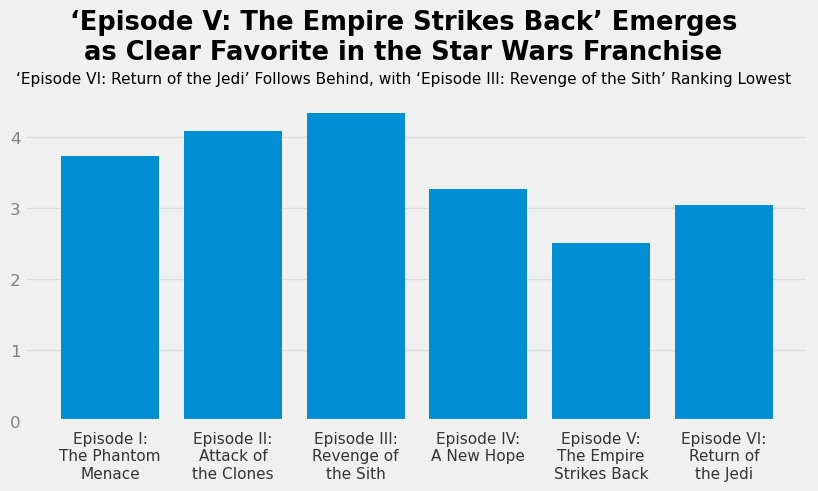

In [13]:
# Specify the size of the figure
plt.figure(figsize=(9, 4))

# Add a main title and a subtitle
plt.suptitle("‘Episode V: The Empire Strikes Back’ Emerges\n\
as Clear Favorite in the Star Wars Franchise",
             x=0.5, y=1.1, size=18.5, ha='center', weight='bold')
plt.figtext(s="‘Episode VI: Return of the Jedi’ Follows Behind, \
with ‘Episode III: Revenge of the Sith’ Ranking Lowest",
            ha="center", x=0.5, y=0.915, size=11)

# Create a bar plot showing the mean rankings for each Star Wars movie
plt.bar(x=['Episode I:\nThe Phantom\nMenace',
           'Episode II:\nAttack of\nthe Clones',
           'Episode III:\nRevenge of\nthe Sith',
           'Episode IV:\nA New Hope',
           'Episode V:\nThe Empire\nStrikes Back',
           'Episode VI:\nReturn of\nthe Jedi'],
        height=mean_rankings)

# Customize ticks and gridlines for both axes
plt.tick_params(axis='x', pad=7)
plt.xticks(size=11, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.5)

# Display the plot
plt.show()

The mean rankings offer intriguing insights into the popularity of each Star Wars movie among respondents, where a rank of `1` indicates the most favorite and `6` indicates the least favorite. `Episode V: The Empire Strikes Back` emerges as the clear favorite, with a mean ranking of `2.51`, indicating it's highly regarded among fans. `Episode VI: Return of the Jedi` follows behind with a mean ranking of `3.05`, suggesting it holds a significant place in fans' hearts as well. However, `Episode III: Revenge of the Sith` ranks as the least favorite among all the Star Wars films, with a mean ranking of `4.34`.

## 6. Finding the Most Viewed Movie

Earlier, we cleaned up the `seen` columns and converted their values to the Boolean type. Some methods like `pandas.DataFrame.sum` treat Booleans like integers – considering `True` as `1` and `False` as `0`. This allows us to determine the number of people who have seen each movie simply by summing the values in each `seen` column. Therefore, we'll be able to visualize the number of respondents who have seen each film.

In [14]:
# Calculate the number of respondents who have seen each movie
seen_counts = star_wars[star_wars.columns[3:9]].sum()
seen_counts

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

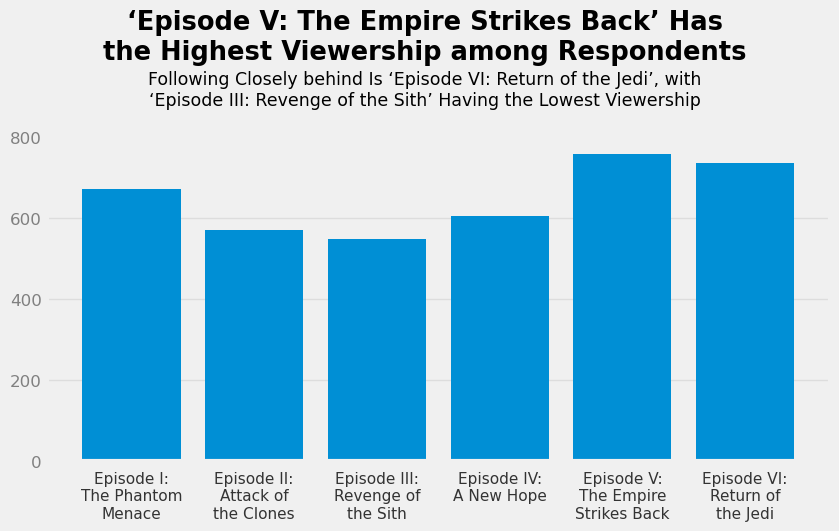

In [15]:
# Specify the figure size
plt.figure(figsize=(9, 4))

# Add a main title and a subtitle
plt.suptitle("‘Episode V: The Empire Strikes Back’ Has\nthe Highest Viewership among Respondents",
             x=0.5, y=1.2, size=18.5, ha='center', weight='bold')
plt.figtext(s="Following Closely behind Is ‘Episode VI: Return of the Jedi’, with\n\
‘Episode III: Revenge of the Sith’ Having the Lowest Viewership",
            ha="center", x=0.5, y=0.96, size=12.5)

# Create a bar plot showing the number of respondents who have seen each Star Wars movie
plt.bar(x=['Episode I:\nThe Phantom\nMenace',
           'Episode II:\nAttack of\nthe Clones',
           'Episode III:\nRevenge of\nthe Sith',
           'Episode IV:\nA New Hope',
           'Episode V:\nThe Empire\nStrikes Back',
           'Episode VI:\nReturn of\nthe Jedi'],
        height=seen_counts)

# Customize ticks and gridlines for both axes
plt.tick_params(axis='x', pad=7)
plt.yticks(ticks=range(0, 1000, 200), size=12, c='grey')
plt.xticks(size=11, c='#333333')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', alpha=0.5)

# Display the plot
plt.show()

The data indicates that `Episode V: The Empire Strikes Back` has the highest viewership among respondents, with `758` individuals having seen it. Following closely behind is `Episode VI: Return of the Jedi`, with `738` respondents having seen it. Overall, the first three episodes appear to have lower viewership compared to the last three, with `Episode III: Revenge of the Sith` having the lowest viewership count at `550` respondents.

## 7. Exploring the Data by Binary Segments

### 7.1. Calculating and Visualizing the Mean Rankings for Each Gender

We now understand which movies the entire survey population has ranked the highest. Next, let's explore how specific segments of the survey population responded. The dataset includes several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` – **True** or **False**.
- `Do you consider yourself to be a fan of the Star Trek franchise?` – **Yes** or **No**.
- `Gender` – **Male** or **Female**.

In our case, we'd like to split our dataset into two groups based on the `Gender` column. Moreover, we'd like to visualize the mean rankings of each movie for each gender.

In [16]:
# Count the percentage of respondents for each gender category, including missing values
star_wars['Gender'].value_counts(normalize=True, dropna=False) * 100

Female   46.29
Male     41.91
NaN      11.80
Name: Gender, dtype: float64

Since the percentages of `males` and `females` in our dataset aren't significantly different, it's reasonable to compute and compare statistics for each gender. As for the missing values, we'll simply exclude them.

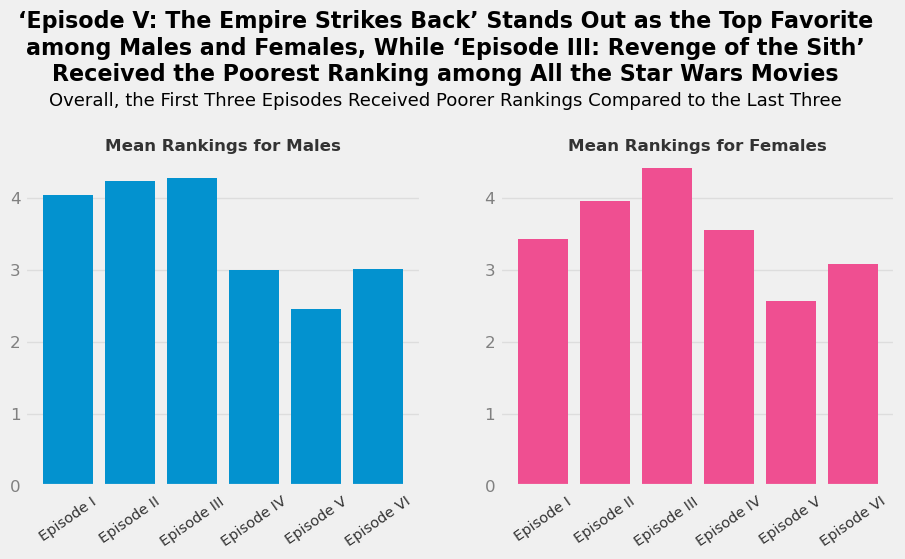

In [17]:
# Create subsets for males and females based on the "Gender" column
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Calculate mean rankings for males and females
male_mean_rankings = males[males.columns[9:15]].mean()
female_mean_rankings = females[females.columns[9:15]].mean()


# Set the figure size
plt.figure(figsize=(10, 4))

# Add a main title and a subtitle
plt.suptitle('‘Episode V: The Empire Strikes Back’ Stands Out as the Top Favorite\n\
among Males and Females, While ‘Episode III: Revenge of the Sith’\n\
Received the Poorest Ranking among All the Star Wars Movies',
             ha="center", weight='bold', size=16, x=0.5, y=1.26)
plt.figtext(s="Overall, the First Three Episodes Received Poorer Rankings \
Compared to the Last Three",
            ha="center", x=0.5, y=1.02, size=13)

# Create subplot for displaying mean rankings for males
plt.subplot(1, 2, 1)
plt.bar(x=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
        height=male_mean_rankings, color='#0392cf')
plt.title('Mean Rankings for Males', c='#333333', weight='bold', size=12, pad=8)
plt.tick_params(axis='x', pad=6)
plt.xticks(size=10.5, rotation=35, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.ylim(0, 4.5)

# Create subplot for displaying mean rankings for females
plt.subplot(1, 2, 2)
plt.bar(x=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
        height=female_mean_rankings, color='#ef4f91')
plt.title('Mean Rankings for Females', c='#333333', weight='bold', size=12, pad=8)
plt.tick_params(axis='x', pad=6)
plt.xticks(size=10.5, rotation=35, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.ylim(0, 4.5)

# Display the plot
plt.show()

The mean rankings provide intriguing insights into the preferences of `male` and `female` survey respondents regarding the Star Wars movies. It's worth noting again that a ranking of `1` indicates the most favorite, while a ranking of `6` indicates the least.

Among males, `Episode V: The Empire Strikes Back` stands out as the top favorite, with a mean ranking of approximately `2.46`, closely followed by `Episode IV: A New Hope` and `Episode VI: Return of the Jedi`. Overall, the first three episodes received poorer rankings compared to the last three, suggesting a weaker preference among male respondents for the earlier Star Wars episodes.

In contrast, among female respondents, `Episode V: The Empire Strikes Back` also emerges as a favorite, with a mean ranking of approximately `2.57`. However, `Episode IV: A New Hope` received a poorer ranking compared to males. Additionally, `Episode III: Revenge of the Sith` received the worst ranking among all the Star Wars movies, suggesting a less favorable perception of this film among females as well.

### 7.2. Calculating and Visualizing the Total Views for Each Gender

Next, let's calculate and visualize the total number of views for each movie among males and females.

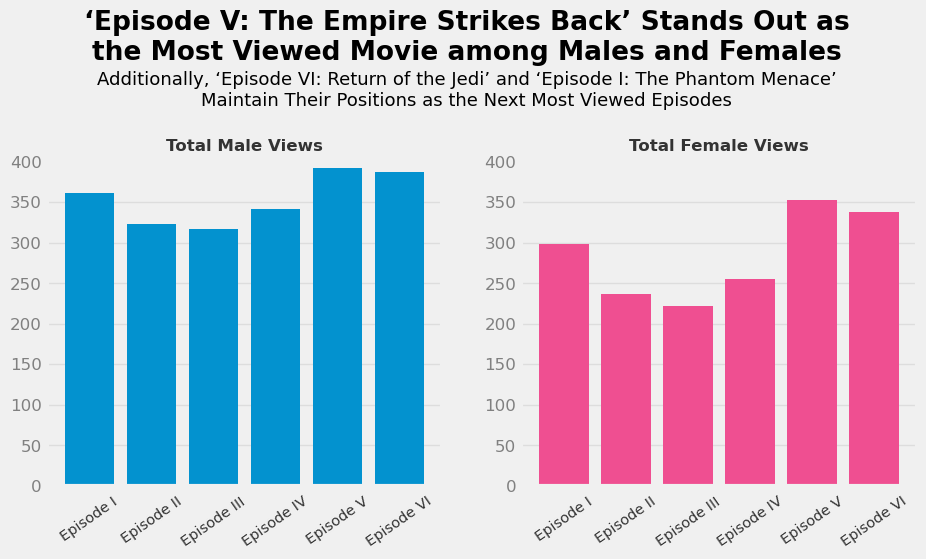

In [18]:
# Calculate the total number of views for each movie among males and females
male_seen_counts = males[males.columns[3:9]].sum()
female_seen_counts = females[females.columns[3:9]].sum()


# Set the figure size
plt.figure(figsize=(10, 4))

# Add a main title and a subtitle
plt.suptitle('‘Episode V: The Empire Strikes Back’ Stands Out as\n\
the Most Viewed Movie among Males and Females',
             ha="center", weight='bold', size=19, x=0.5, y=1.26)
plt.figtext(s="Additionally, ‘Episode VI: Return of the Jedi’ and ‘Episode I: The Phantom Menace’\n\
Maintain Their Positions as the Next Most Viewed Episodes",
            ha="center", x=0.5, y=1.02, size=13)

# Create subplot for displaying total views of movies among males
plt.subplot(1, 2, 1)
plt.bar(x=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
        height=male_seen_counts, color='#0392cf')
plt.title('Total Male Views', c='#333333', weight='bold', size=12, pad=8)
plt.tick_params(axis='x', pad=6)
plt.xticks(size=10.5, rotation=35, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.ylim(0, 400)

# Create subplot for displaying total views of movies among females
plt.subplot(1, 2, 2)
plt.bar(x=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
        height=female_seen_counts, color='#ef4f91')
plt.title('Total Female Views', c='#333333', weight='bold', size=12, pad=8)
plt.tick_params(axis='x', pad=6)
plt.xticks(size=10.5, rotation=35, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.ylim(0, 400)

# Display the plot
plt.show()

The data reveals interesting disparities in the total views of Star Wars movies between males and females. Among males, `Episode V: The Empire Strikes Back` emerges as the most viewed movie, with `392` individuals having seen it, closely followed by `Episode VI: Return of the Jedi`.

Conversely, among females, `Episode V: The Empire Strikes Back` also stands out as the most viewed movie, but with a slightly lower count of `353` respondents. Additionally, `Episode VI: Return of the Jedi` and `Episode I: The Phantom Menace` maintain their positions as the next most viewed movies among females as well.

## 8. Exploring the Data by Non-binary Segments

### 8.1. Calculating the Mean Rankings for Each Education Level

After exploring the data based on a binary segment (i.e. `Gender`), let's examine how other segments of the survey population responded. The dataset also includes several columns that segment our data into more than two groups. Here are two examples:

- `Location (Census Region)` – categorizes respondents based on geographic region.
- `Education` – categorizes respondents based on level of education.

This time, we'd like to split our dataset into multiple groups based on education level, and discover the highest-ranked movies for each level.

In [19]:
# Count the number of respondents for each education level, including missing values
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

Calculating statistics for each education level seems reasonable, as there are substantial numbers of respondents in each category. However, considering the representativeness of each group, it's evident that respondents with a high school degree are relatively less representative, and those with less than a high school degree make up only `7` individuals in the entire dataset.

Therefore, we'll exclude respondents with less than a high school degree. Since the number of missing values is significant, we'll replace them with the string `Unknown`.

In [20]:
# Fill missing values in the 'Education' column with 'Unknown'
star_wars['Education'].fillna('Unknown', inplace=True)

Now, let's store the mean rankings for each education level in a dictionary called `education_mean_rankings`.

In [21]:
# Store mean rankings for each education level
education_mean_rankings = {}

# Filter data for each education level
college_associate = star_wars[star_wars["Education"] == "Some college or Associate degree"]
high_school = star_wars[star_wars["Education"] == "High school degree"]
bachelor = star_wars[star_wars["Education"] == "Bachelor degree"]
graduate = star_wars[star_wars["Education"] == "Graduate degree"]
unknown = star_wars[star_wars["Education"] == "Unknown"]

# Calculate mean rankings for each education level and store them in the dictionary
for education, df in zip(['high_school', 'college_associate', 'bachelor', 'graduate', 'unknown'],
                         [high_school, college_associate, bachelor, graduate, unknown]):
    education_mean_rankings[education] = df[df.columns[9:15]].mean()

# Display the mean rankings for each education level
education_mean_rankings

{'high_school': ranking_1   3.80
 ranking_2   3.75
 ranking_3   4.13
 ranking_4   3.21
 ranking_5   2.87
 ranking_6   3.24
 dtype: float64,
 'college_associate': ranking_1   3.55
 ranking_2   3.89
 ranking_3   4.10
 ranking_4   3.50
 ranking_5   2.78
 ranking_6   3.17
 dtype: float64,
 'bachelor': ranking_1   3.83
 ranking_2   4.29
 ranking_3   4.52
 ranking_4   3.11
 ranking_5   2.31
 ranking_6   2.93
 dtype: float64,
 'graduate': ranking_1   3.82
 ranking_2   4.23
 ranking_3   4.50
 ranking_4   3.20
 ranking_5   2.32
 ranking_6   2.92
 dtype: float64,
 'unknown': ranking_1   3.35
 ranking_2   3.45
 ranking_3   4.10
 ranking_4   3.55
 ranking_5   2.85
 ranking_6   3.70
 dtype: float64}

### 8.2. Visualizing the Mean Rankings for Each Education Level

Finally, we are ready to plot a side-by-side bar chart for each Star Wars film to compare their mean rankings across education levels.

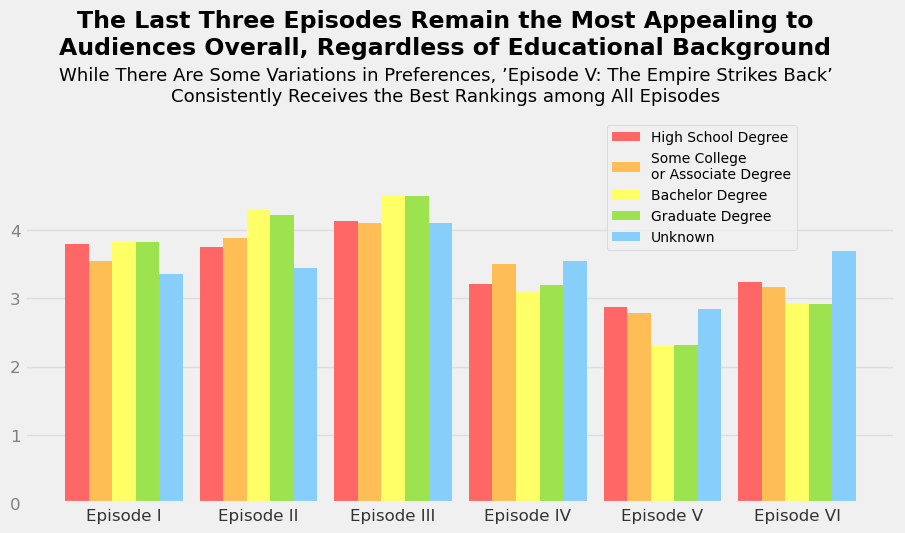

In [22]:
# Set the figure size, and define the width and position for each bar
plt.figure(figsize=(10, 4))
bar_width = 0.35

x_high_school = np.arange(0, len(education_mean_rankings['high_school'])*2, 2)
x_college_associate = x_high_school + bar_width
x_bachelor = x_college_associate + bar_width
x_graduate = x_bachelor + bar_width
x_unknown = x_graduate + bar_width

# Plot a side-by-side bar chart for each episode to compare mean rankings across education levels
plt.bar(x_high_school, education_mean_rankings['high_school'], 
        width=bar_width, color='#ff6666', label='High School Degree')
plt.bar(x_college_associate, education_mean_rankings['college_associate'], 
        width=bar_width, color='#ffbd55', label='Some College\nor Associate Degree')
plt.bar(x_bachelor, education_mean_rankings['bachelor'], 
        width=bar_width, color='#ffff66', label='Bachelor Degree')
plt.bar(x_graduate, education_mean_rankings['graduate'], 
        width=bar_width, color='#9de24f', label='Graduate Degree')
plt.bar(x_unknown, education_mean_rankings['unknown'], 
        width=bar_width, color='#87cefa', label='Unknown')

# Add a main title and a subtitle
plt.suptitle('The Last Three Episodes Remain the Most Appealing to\n\
Audiences Overall, Regardless of Educational Background',
             ha="center", weight='bold', size=17, x=0.5, y=1.305)
plt.figtext(s="While There Are Some Variations in Preferences, ’Episode V: The Empire Strikes Back’\n\
Consistently Receives the Best Rankings among All Episodes",
            ha="center", x=0.5, y=1.075, size=13)

# Customize ticks and gridlines for both axes, and add legend
plt.xticks(ticks = x_bachelor,
           labels=['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI'],
           size=12, c='#333333')
plt.yticks(size=12, c='grey')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', visible=False)
plt.legend(fontsize=10, framealpha=0.8, bbox_to_anchor=(0.66, 0.76))

# Display the plot
plt.show()

The rankings of each education level reveal interesting patterns in preferences among respondents. Among those with a high school education or categorized as `Unknown`, there's a relatively consistent ranking across all episodes, with `Episode III: Revenge of the Sith` being the least favorable among all Star Wars films.

Respondents with some college or an associate degree, a bachelor's, or a graduate degree tend to overall rank the last three episodes better, particularly `Episode V: The Empire Strikes Back`, which consistently receives the best rankings among all episodes.

While there are some variations in preferences among different education levels, the last three episodes remain the most appealing to audiences overall, regardless of educational background.

## 9. Exploring Sentiments toward Star Wars Characters

### 9.1. Renaming Columns and Categorizing Respondents' Sentiments

There are fourteen columns that prompt survey respondents to state whether they view the following characters favorably, unfavorably, or are unfamiliar with them: `Luke Skywalker`, `Han Solo`, `Princess Leia Organa`, `Obi Wan Kenobi`, `Yoda`, `R2-D2`, `C-3P0`, `Anakin Skywalker`, `Darth Vader`, `Lando Calrissian`, `Padme Amidala`, `Boba Fett`, `Darth Sidious`, `Jar Jar Binks`.

Each column contains values ranging from `Very unfavorably` to `Very favorably`, along with missing values. In this context, we'll interpret missing values as indicating respondents didn't have sufficient information about a character to form an opinion, hence they are considered unfamiliar with them.

Now, let's rename the columns to make their representation clear and easily understandable.

In [23]:
# Rename the columns for better clarity
star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Darth Sidious",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2-D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda"
        })

# Display the first few rows of the columns related to respondents' sentiments
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Darth Sidious,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
4,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


Next, we'll clean and merge the unique values for each column related to respondents' sentiments. For instance, characters who are viewed very favorably or somewhat favorably will be categorized as `Favorable`. Additionally, we'll replace missing values with the string `Unfamiliar`.

In [24]:
# Define a function to categorize sentiments for each character
def sentiment(character):
    if character in ['Very favorably', 'Somewhat favorably']:
        return 'Favorable'
    elif character in ['Very unfavorably', 'Somewhat unfavorably']:
        return 'Unfavorable'
    elif character == 'Neither favorably nor unfavorably (neutral)':
        return 'Neutral'
    elif character == 'Unfamiliar (N/A)':
        return 'Unfamiliar'
    else:
        return 'Unfamiliar'
    
# Apply the `sentiment` function to each element in columns related to respondents' sentiments
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].applymap(sentiment)
star_wars[star_wars.columns[15:29]].head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Darth Sidious,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2-D2,Jar Jar Binks,Padme Amidala,Yoda
0,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Unfamiliar,Unfamiliar,Favorable,Favorable,Favorable,Favorable,Favorable
1,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar
2,Favorable,Favorable,Favorable,Favorable,Favorable,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar,Unfamiliar
3,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Favorable,Unfavorable,Favorable,Favorable,Favorable,Favorable,Favorable
4,Favorable,Favorable,Favorable,Unfavorable,Favorable,Unfavorable,Favorable,Neutral,Favorable,Favorable,Favorable,Unfavorable,Favorable,Favorable


### 9.2. Calculating the Percentages of Sentiment Categories for Each Character

Next, we'll loop through each column in the `respondent_opinions` DataFrame, calculate the percentage of responses categorized as `Favorable`, `Unfavorable`, `Unfamiliar`, and `Neutral` for each character, and append the calculated percentages to their respective lists.

In [25]:
# Initialize empty lists to store percentages
favorable_percentage = []
neutral_percentage = []
unfavorable_percentage = []
unfamiliar_percentage = []

# Copy the columns related to respondents' sentiments, 
# then loop through each column to calculate the percentages
respondent_opinions = star_wars[star_wars.columns[15:29]].copy()

for i in range(0, 14):
    favorable_percentage.append((respondent_opinions.iloc[:, i]
                                 .value_counts(normalize=True)['Favorable'] * 100))
    neutral_percentage.append((respondent_opinions.iloc[:, i]
                               .value_counts(normalize=True)['Neutral'] * 100))
    unfavorable_percentage.append((respondent_opinions.iloc[:, i]
                                   .value_counts(normalize=True)['Unfavorable'] * 100))
    unfamiliar_percentage.append((respondent_opinions.iloc[:, i]
                                  .value_counts(normalize=True)['Unfamiliar'] * 100))

Now, let's create a DataFrame where each row corresponds to a character, and each column represents a different sentiment category – `Favorable`, `Unfavorable`, `Unfamiliar`, and `Neutral`. We'll populate the DataFrame with the calculated percentages of each sentiment category for each character.

In [26]:
# Define a list of character names
character_names = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 
                   'Obi Wan Kenobi', 'Darth Sidious', 'Darth Vader', 'Lando Calrissian', 
                   'Boba Fett', 'C-3P0', 'R2-D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']

# Create a DataFrame with the percentages of each sentiment category for each character
respondent_sentiments = pd.DataFrame({'Favorable (%)': favorable_percentage,
                                      'Neutral (%)': neutral_percentage,
                                      'Unfavorable (%)': unfavorable_percentage,
                                      'Unfamiliar (%)': unfamiliar_percentage}, index=character_names)

# Sort the DataFrame by the percentage of favorable sentiments
respondent_sentiments = respondent_sentiments.sort_values(by="Favorable (%)")
respondent_sentiments

,Favorable (%),Neutral (%),Unfavorable (%),Unfamiliar (%)
Jar Jar Binks,20.40,13.83,25.80,39.97
Darth Sidious,21.33,17.96,16.19,44.52
Boba Fett,24.54,20.91,11.89,42.66
Padme Amidala,29.60,17.45,7.76,45.19
Lando Calrissian,30.78,19.90,5.99,43.34
Darth Vader,40.56,7.08,21.16,31.20
Anakin Skywalker,43.34,11.38,10.29,34.99
C-3P0,59.27,6.66,2.53,31.53
R2-D2,62.98,4.81,1.35,30.86
Yoda,63.15,4.30,1.35,31.20


### 9.3. Revealing the Most Liked, Disliked, and Controversial Characters

Finally, let's create a plot to clearly reveal which characters respondents like the most, dislike the most, and find most controversial (split between likes and dislikes).

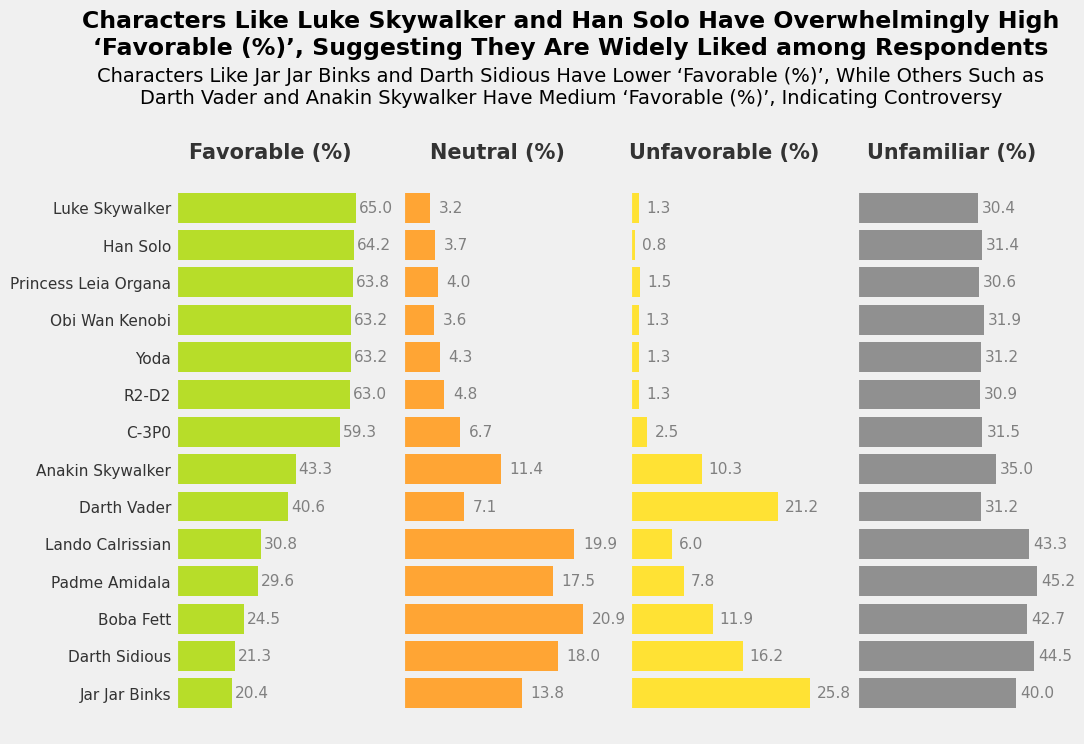

In [27]:
# Define the figure size and sentiment colors
plt.figure(figsize=(10, 7))
sentiment_colors = ['#ffa534', '#ffe234', '#909090']

# Add a main title and a subtitle
plt.suptitle("Characters Like Luke Skywalker and Han Solo Have Overwhelmingly High\n\
‘Favorable (%)’, Suggesting They Are Widely Liked among Respondents",
             ha="center", weight='bold', size=17, x=0.475, y=1.105)
plt.figtext(s="Characters Like Jar Jar Binks and Darth Sidious Have Lower ‘Favorable (%)’, While Others Such as\n\
Darth Vader and Anakin Skywalker Have Medium ‘Favorable (%)’, Indicating Controversy",
            ha="center", x=0.475, y=0.97, size=14)


# Create a subplot for the 'Favorable (%)' category
plt.subplot(1, 4, 1)
bars = plt.barh(y=respondent_sentiments.index, 
                width=respondent_sentiments['Favorable (%)'], color='#b7dd29')
plt.title('Favorable (%)', weight='bold', c='#333333', size=15)
plt.yticks(size=11, c='#333333')
plt.xticks(visible=False)
plt.grid(visible=False)

# Add percentage labels to the end of each bar
for bar in bars:
    plt.text(x=bar.get_width() + 1, y=bar.get_y() + bar.get_height()/2, s=f"{bar.get_width():.1f}", 
             va='center', fontsize=11, color='grey')


# Loop through the other sentiment categories to create a subplot for each
for i, color, category in zip(range(2,5), sentiment_colors, respondent_sentiments.columns[1:]):
    plt.subplot(1, 4, i)
    bars = plt.barh(y=respondent_sentiments.index, width=respondent_sentiments[category], color=color)
    plt.title(category, weight='bold', c='#333333', size=15)
    plt.yticks(visible=False)
    plt.xticks(visible=False)
    plt.grid(visible=False)
    
    # Add percentage labels to the end of each bar
    for bar in bars:
        plt.text(x=bar.get_width() + 1, y=bar.get_y() + bar.get_height()/2, 
                 s=f"{bar.get_width():.1f}", va='center', fontsize=11, color='grey')

# Display the plot
plt.show()

Looking at the plot, it's evident that characters like `Luke Skywalker`, `Han Solo`, `Princess Leia Organa`, and `Obi Wan Kenobi` have overwhelmingly high favorable percentages, ranging from around `63%` to `65%`. This suggests that they are widely liked among respondents. On the other hand, characters like `Jar Jar Binks`, `Darth Sidious`, and `Boba Fett` have significantly lower favorable percentages, around `20%` to `25%`.

Interestingly, characters such as `Darth Vader`, `Anakin Skywalker`, and `C-3P0` have favorable percentages ranging from around `40%` to `60%`, indicating controversy. This suggests that these characters evoke more diverse opinions among respondents.

Overall, there are varying degrees of popularity and likability among different Star Wars characters. Some are universally adored, while others are more divisive or even disliked. These insights can be valuable for understanding fan sentiment and preferences within the Star Wars fandom.

## 10. Conclusion

In this project, we used a dataset gathered from surveyed Star Wars fans. Upon our initial exploration of the data, we discovered that several columns contain responses to questions about the Star Wars movies. Furthermore, we cleaned, mapped, and converted several columns; we also renamed them to be more representative. Additionally, we analyzed and replaced some null values with appropriate ones.

We calculated and visualized the mean ranking for each Star Wars movie to determine the highest-ranked film. Our findings indicate that `Episode V: The Empire Strikes Back` emerged as the clear favorite in the Star Wars franchise, and `Episode VI: Return of the Jedi` followed closely behind. However, `Episode III: Revenge of the Sith` ranked the lowest.

We also calculated the number of respondents who have seen each Star Wars film, and created a bar plot to display the number of viewers. Our findings indicate that `Episode V: The Empire Strikes Back` had the highest viewership among respondents, closely followed by `Episode VI: Return of the Jedi`. Overall, the first three episodes had lower viewership compared to the last three, with `Episode III: Revenge of the Sith` having the lowest viewership.

Afterward, we divided our dataset into two groups based on the `Gender` column, then calculated and visualized the mean rankings as well as the total number of views of each movie for each gender. Here are some insights we’ve gleaned:

- Among males, `Episode V: The Empire Strikes Back` stood out as the top favorite, closely followed by `Episode IV: A New Hope` and `Episode VI: Return of the Jedi`. In contrast, among female respondents, `Episode V: The Empire Strikes Back` also emerged as a favorite. However, `Episode IV: A New Hope` received a poorer ranking compared to males.
- Overall, the first three episodes received poorer rankings compared to the last three among males and females, with `Episode III: Revenge of the Sith` receiving the worst ranking among all the Star Wars movies. This suggests a weaker preference for the earlier Star Wars episodes.
- `Episode V: The Empire Strikes Back` emerged as the most viewed movie for both genders. Additionally, `Episode VI: Return of the Jedi` and `Episode I: The Phantom Menace` maintained their positions as the next most viewed movies.

Additionally, we divided our dataset into multiple groups based on the `Education` column, then calculated and visualized the mean rankings of each movie for each education level. We found that overall, the last three episodes remained the most appealing to the respondents, regardless of their educational background. While there were some variations in preferences among different education levels, `Episode V: The Empire Strikes Back` consistently received the best rankings among all episodes.

Finally, we renamed columns related to respondents' opinions about each Star Wars character and categorized respondents' sentiments. We then calculated the percentage of each sentiment category for every character and created a plot to clearly reveal which characters respondents liked the most, disliked the most, and found most controversial.

Overall, there are varying degrees of popularity and likability among different Star Wars characters. Unlike characters such as `Jar Jar Binks` and `Darth Sidious`, characters like `Luke Skywalker` and `Han Solo` had overwhelmingly high favorable percentages. Interestingly, characters such as `Darth Vader` and `Anakin Skywalker` had medium favorable percentages, which indicates controversy.